## Tech chanllenge

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw_data/measurements.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
df.shape

(388, 12)

In [5]:
df.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [6]:
df.tail(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,"16,2","4,4",39,"24,5",17,ac,SP98,1,0,0,NaN,NaN
379,"16,7","3,8",44,"24,5",23,sun,SP98,0,0,1,NaN,NaN
380,"8,3",5,52,"24,5",27,NaN,SP98,0,0,0,NaN,NaN
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [7]:
## title
## missing value
## distance, consume, temp_inside, refill liters - int64

#### Data cleaning

In [8]:
data = df.copy()

In [9]:
# change all column names into a lower case and replace ' ' with '_'

def clean_colname(df):
    cols = []
    for colname in df.columns:
        cols.append(colname.replace(' ','_').lower())
    df.columns = cols
    return df

In [10]:
data = clean_colname(data)

In [11]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [12]:
data['distance'] = data['distance'].str.replace(',', '.')

In [13]:
data['consume'] = data['consume'].str.replace(',', '.')

In [14]:
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')

In [15]:
data['refill_liters'] = data['refill_liters'].str.replace(',', '.')

In [16]:
data = data.astype({'distance':'float','consume':'float','temp_inside':'float','refill_liters':'float'})

In [17]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [18]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [19]:
data['ac'].value_counts()

0    358
1     30
Name: ac, dtype: int64

In [20]:
data['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [21]:
data['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [22]:
### function to check all column value counts including NaN
def get_column_value_counts(df):
    value_counts_dict = {}
    for column in df.columns:
        value_counts = df[column].value_counts(dropna=False)
        value_counts_dict[column] = value_counts
    return value_counts_dict

In [23]:
result = get_column_value_counts(data)

In [24]:
for column, value_counts in result.items():
    print(f"Value counts for {column}:")
    print(value_counts)
    print()

Value counts for distance:
11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64

Value counts for consume:
5.0     27
4.5     27
4.6     22
4.7     21
4.3     20
4.1     20
5.1     19
4.8     19
4.4     17
4.0     17
4.9     16
4.2     15
5.3     14
3.9     14
5.2     12
3.8     11
5.7     11
5.6     10
5.4      9
3.7      8
5.8      7
5.5      6
5.9      5
3.6      4
6.4      4
6.1      4
6.2      4
6.0      4
6.3      4
8.1      2
6.5      2
7.4      2
6.9      1
8.7      1
12.2     1
7.9      1
10.8     1
9.9      1
7.1      1
3.3      1
9.0      1
11.5     1
6.6      1
Name: consume, dtype: int64

Value counts for speed:
42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61   

In [25]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [26]:
data.isnull().sum()/len(data)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
ac               0.000000
rain             0.000000
sun              0.000000
refill_liters    0.966495
refill_gas       0.966495
dtype: float64

In [27]:
data['refill_liters'].unique()

array([45. ,  nan, 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

In [28]:
data['refill_gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [29]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [30]:
data['specials'] = data['specials'].str.lower()
data['specials']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
383    NaN
384     ac
385    NaN
386     ac
387     ac
Name: specials, Length: 388, dtype: object

In [31]:
data['specials'].unique()

array([nan, 'ac rain', 'ac', 'rain', 'snow', 'ac snow',
       'half rain half sun', 'sun', 'ac sun', 'sun ac'], dtype=object)

In [32]:
data['specials'] = data['specials'].replace({'sun ac':'ac sun'},inplace = False)

In [33]:
data['specials'].unique()

array([nan, 'ac rain', 'ac', 'rain', 'snow', 'ac snow',
       'half rain half sun', 'sun', 'ac sun'], dtype=object)

In [34]:
data['specials'] = data['specials'].fillna('unknown',inplace = False)

In [35]:
data['temp_inside'].fillna(data['temp_inside'].median(), inplace=True)

In [36]:
data['refill_gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [37]:
data['refill_gas'].value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill_gas, dtype: int64

In [38]:
data['refill_gas'].fillna('unknown', inplace=True)

In [39]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,NaN,unknown
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,NaN,unknown
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,NaN,unknown
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,NaN,unknown


In [40]:
data['refill_liters'].value_counts(dropna=False)

NaN     375
45.0      2
37.7      2
39.0      2
37.6      1
38.0      1
38.3      1
10.0      1
41.0      1
37.0      1
37.2      1
Name: refill_liters, dtype: int64

In [41]:
data['refill_liters'].fillna('unknown', inplace=True)

In [ ]:
#data['refill_liters'].fillna(data['refill_liters'].median(), inplace=True)

In [42]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,unknown,unknown
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,unknown,unknown
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,unknown,unknown
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,unknown,SP98,0,0,0,unknown,unknown
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0,unknown,unknown
385,16.0,3.8,45,25.0,19,unknown,SP98,0,0,0,unknown,unknown
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0,unknown,unknown


In [43]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
ac               0
rain             0
sun              0
refill_liters    0
refill_gas       0
dtype: int64

In [44]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  388 non-null    object 
 11  refill_gas     388 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [46]:
data.to_csv('../data/clean_data/measurements_cleaned.csv')

### EDA

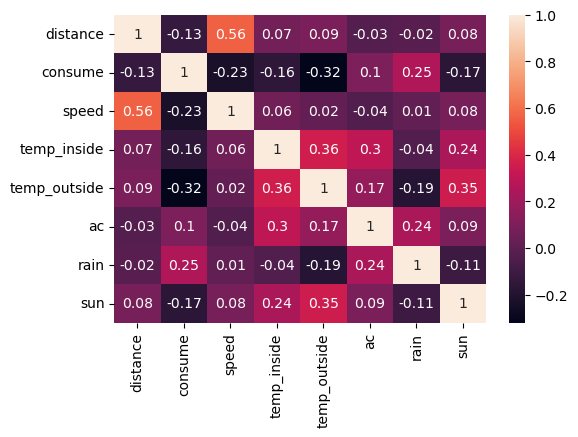

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  388 non-null    object 
 11  refill_gas     388 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [51]:
data[data.duplicated()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas


In [53]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,unknown,unknown
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,unknown,unknown
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,unknown,unknown
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,unknown,unknown


<AxesSubplot:xlabel='gas_type', ylabel='count'>

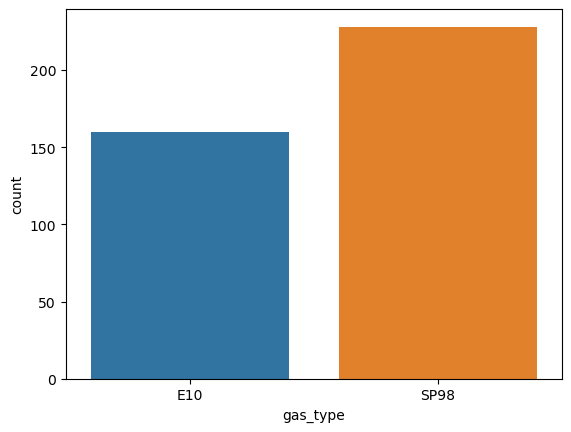

In [64]:
sns.countplot(x=data['gas_type'])

<AxesSubplot:xlabel='specials', ylabel='count'>

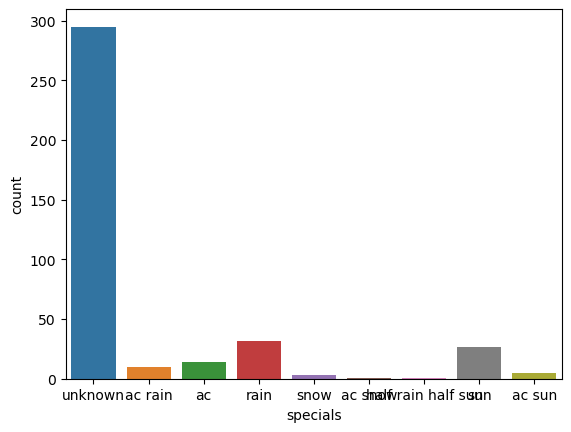

In [63]:
sns.countplot(x=data['specials'])

<AxesSubplot:xlabel='refill_liters', ylabel='count'>

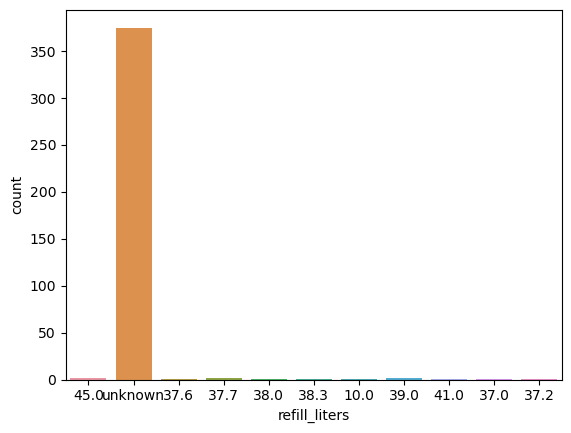

In [58]:
sns.countplot(x=data['refill_liters'])

/Users/yunlingge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='refill_gas', ylabel='count'>

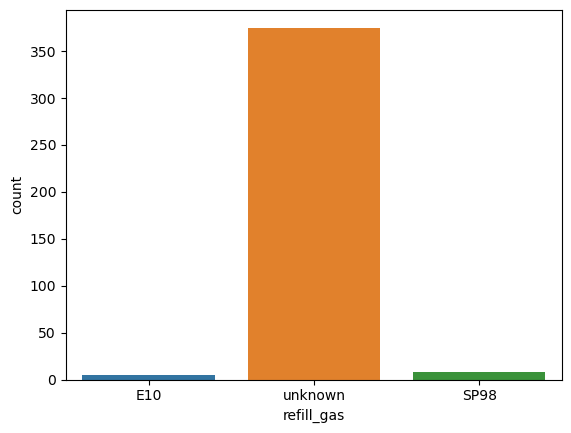

In [65]:
sns.countplot(data['refill_gas'])

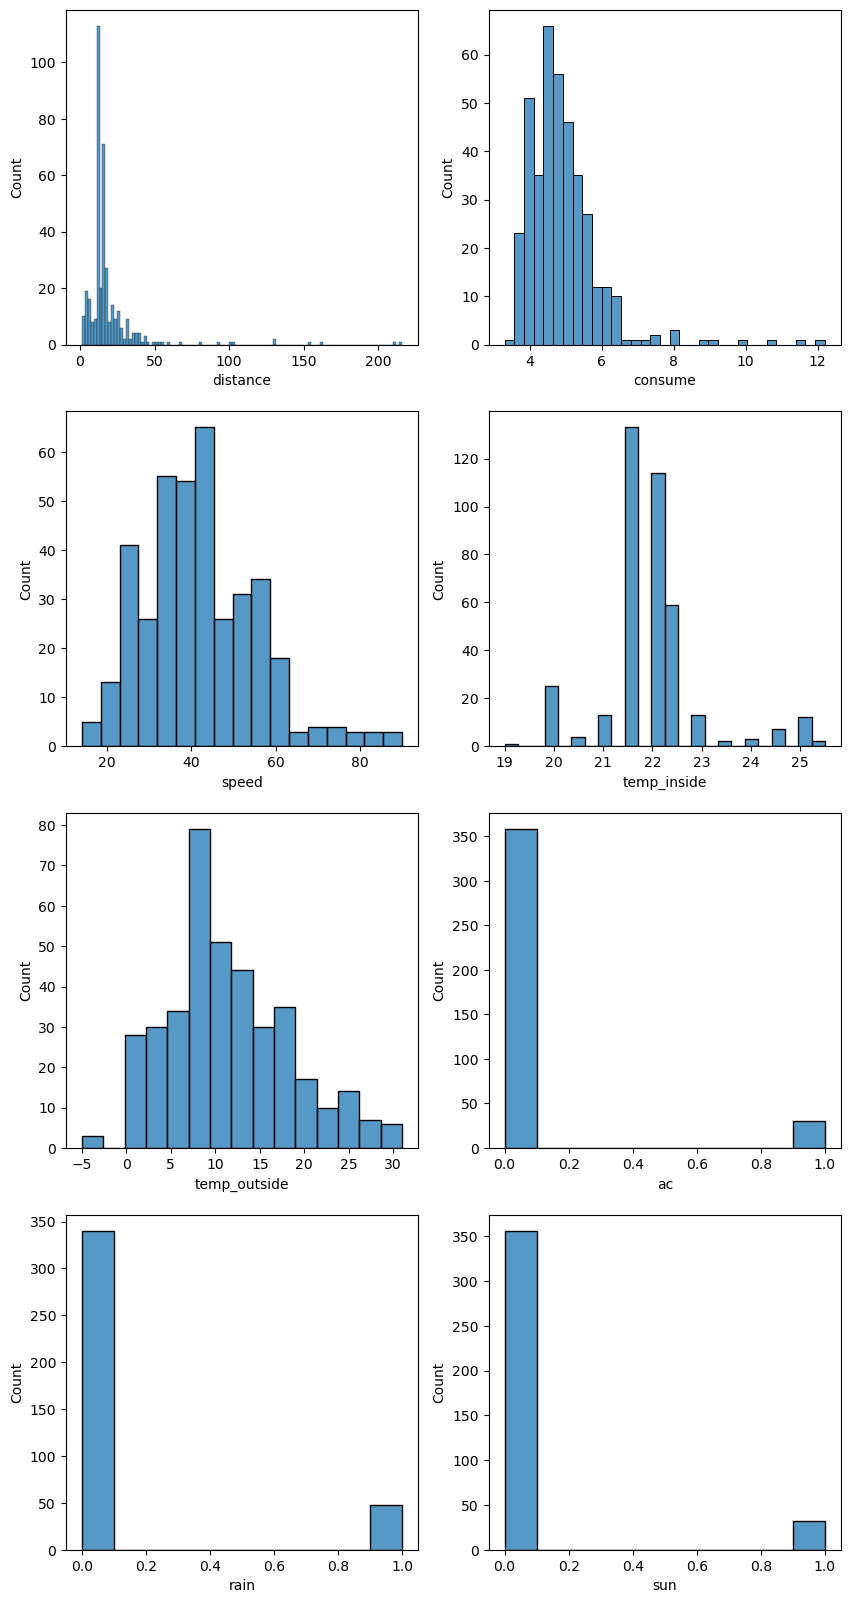

In [59]:
fig,ax = plt.subplots(4,2,figsize=(10,20))
sns.histplot(data['distance'],ax= ax[0,0])
sns.histplot(data['consume'],ax= ax[0,1])
sns.histplot(data['speed'],ax= ax[1,0])
sns.histplot(data['temp_inside'],ax= ax[1,1])
sns.histplot(data['temp_outside'],ax= ax[2,0])
sns.histplot(data['ac'],ax= ax[2,1])
sns.histplot(data['rain'],ax= ax[3,0])
sns.histplot(data['sun'],ax= ax[3,1])

plt.show()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
y = data['consume']
X = data.drop(['consume'],axis =1)

In [68]:
X.head()

,distance,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,26,21.5,12,unknown,E10,0,0,0,45.0,E10
1,12.0,30,21.5,13,unknown,E10,0,0,0,unknown,unknown
2,11.2,38,21.5,15,unknown,E10,0,0,0,unknown,unknown
3,12.9,36,21.5,14,unknown,E10,0,0,0,unknown,unknown
4,18.5,46,21.5,15,unknown,E10,0,0,0,unknown,unknown


### Normalize(numerical)

In [70]:
X_num = X.select_dtypes(include = np.number)

In [71]:
X_num

,distance,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,26,21.5,12,0,0,0
1,12.0,30,21.5,13,0,0,0
2,11.2,38,21.5,15,0,0,0
3,12.9,36,21.5,14,0,0,0
4,18.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0
384,16.1,38,25.0,31,1,0,0
385,16.0,45,25.0,19,0,0,0
386,15.4,42,25.0,31,1,0,0


In [72]:
from sklearn.preprocessing import MinMaxScaler 
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns) 
x_normalized.head()

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (388, 7)


,distance,speed,temp_inside,temp_outside,ac,rain,sun
0,0.124302,0.157895,0.384615,0.472222,0.0,0.0,0.0
1,0.049814,0.210526,0.384615,0.500000,0.0,0.0,0.0
2,0.046089,0.315789,0.384615,0.555556,0.0,0.0,0.0
3,0.054004,0.289474,0.384615,0.527778,0.0,0.0,0.0
4,0.080074,0.421053,0.384615,0.555556,0.0,0.0,0.0


### Train_test split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=50) 

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(310, 7)
(78, 7)
(310,)
(78,)


In [79]:
X_train.dtypes

distance        float64
speed           float64
temp_inside     float64
temp_outside    float64
ac              float64
rain            float64
sun             float64
dtype: object

### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

In [83]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [84]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(r2_train)
print(r2_test)

0.1940870962103779
0.20625167652713128
